In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import drive
drive.mount('/content/drive')

# Đọc dữ liệu
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/agnews/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/agnews/test.csv')

# Gộp dữ liệu
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Tạo cột text
df['text'] = df['Title'] + " " + df['Description']

# Chuyển nhãn về 0-based
df['label'] = df['Class Index'] - 1

print(df.head())


Mounted at /content/drive
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  \
0  Reuters - Short-sellers, Wall Street's dwindli...   
1  Reuters - Private investment firm Carlyle Grou...   
2  Reuters - Soaring crude prices plus worries\ab...   
3  Reuters - Authorities have halted oil export\f...   
4  AFP - Tearaway world oil prices, toppling reco...   

                                                text  label  
0  Wall St. Bears Claw Back Into the Black (Reute...      2  
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2  
2  Oil and Economy Cloud Stocks' Out

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
#Text Preprocessing
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)                   # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)              # Keep only letters
    text = text.lower()                                 # Convert to lowercase
    tokens = nltk.word_tokenize(text)                   # Tokenize text
    tokens = [lemmatizer.lemmatize(w) for w in tokens
              if w not in stop_words and w not in string.punctuation]  # Remove stopwords and punctuation
    return ' '.join(tokens)

# Apply preprocessing function to text
df['clean_text'] = df['text'].apply(preprocess_text)

# Ensure labels are categorical integers
df['label'] = df['label'].astype('category').cat.codes

In [6]:
#Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Train ML Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Choose one classifier
clf = LogisticRegression(max_iter=1000)
# clf = RandomForestClassifier()
# clf = LinearSVC()

# Train and evaluate
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Show performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6283
           1       0.95      0.98      0.97      6466
           2       0.88      0.88      0.88      6370
           3       0.89      0.89      0.89      6401

    accuracy                           0.91     25520
   macro avg       0.91      0.91      0.91     25520
weighted avg       0.91      0.91      0.91     25520



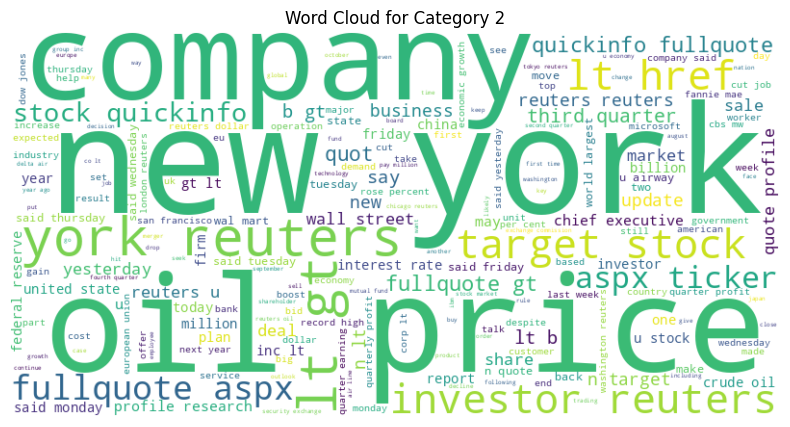

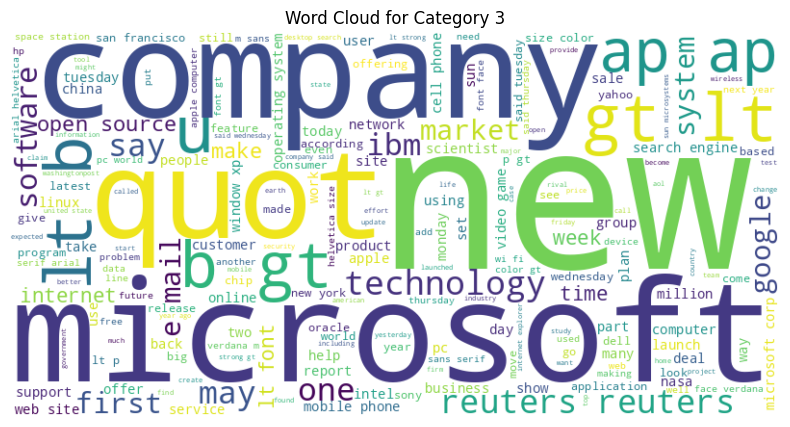

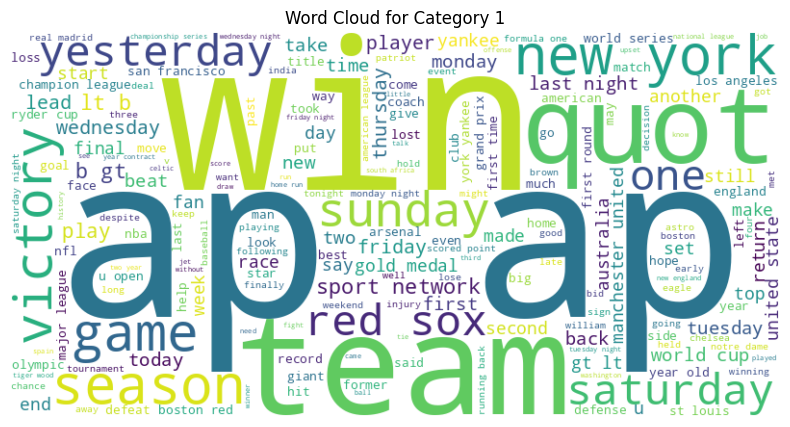

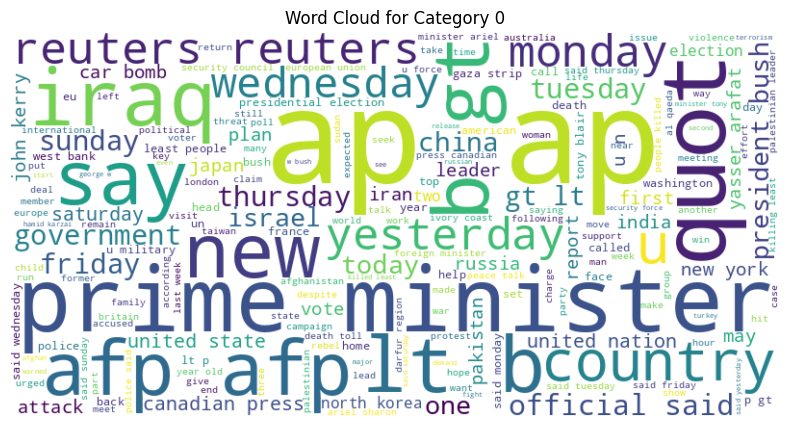

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate and display word cloud for each label
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Category {label}")
    plt.show()

🎯 Test Accuracy (SVM): 0.9118

📊 Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.90      0.91      6380
      Sports       0.95      0.98      0.96      6380
    Business       0.88      0.89      0.89      6380
    Sci/Tech       0.89      0.88      0.89      6380

    accuracy                           0.91     25520
   macro avg       0.91      0.91      0.91     25520
weighted avg       0.91      0.91      0.91     25520



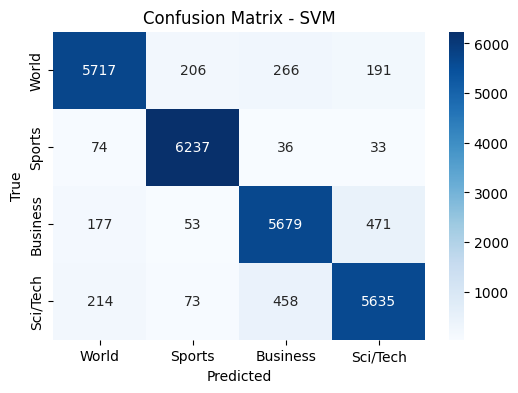

/tmp/ipython-input-603590278.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


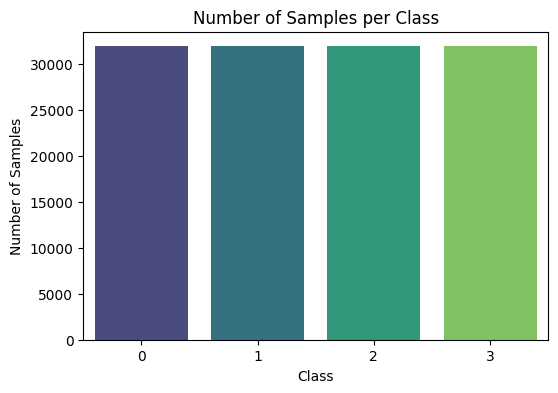

In [10]:
# --- Feature Extraction (TF-IDF) ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Biến đổi văn bản thành vector TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])   # X là ma trận đặc trưng
y = df['label']                                  # y là nhãn

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Huấn luyện mô hình SVM ---
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán
y_pred = svm_model.predict(X_test)

# --- Đánh giá ---
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Test Accuracy (SVM): {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(
    y_test, y_pred, target_names=["World", "Sports", "Business", "Sci/Tech"]
))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["World","Sports","Business","Sci/Tech"],
            yticklabels=["World","Sports","Business","Sci/Tech"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.show()
# --- Biểu đồ so sánh số mẫu của từng lớp ---
import pandas as pd

# Đếm số lượng mẫu của từng lớp
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class")
plt.show()


**Note:** Make sure to run the previous cell performing TF-IDF vectorization before running this cell.

In [11]:
import xgboost as xgb

# Instantiate and train XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Predict and report results
y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6380
           1       0.92      0.96      0.94      6380
           2       0.87      0.87      0.87      6380
           3       0.86      0.86      0.86      6380

    accuracy                           0.89     25520
   macro avg       0.89      0.89      0.89     25520
weighted avg       0.89      0.89      0.89     25520



In [12]:
!pip install gradio
import gradio as gr
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
import pickle

# Lưu mô hình SVM
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Lưu vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [15]:
def classify_news(text):
    # Tiền xử lý văn bản đầu vào
    text_tfidf = tfidf_vectorizer.transform([text])
    # Dự đoán nhãn của văn bản
    prediction = svm_model.predict(text_tfidf)
    return prediction[0]


In [16]:
iface = gr.Interface(fn=classify_news,
                     inputs=gr.Textbox(lines=5, placeholder="Nhập tin tức vào đây..."),
                     outputs="text",
                     title="Phân loại tin tức với SVM",
                     description="Nhập văn bản tin tức để phân loại vào một trong các nhóm: Thế giới, Thể thao, Kinh doanh, Khoa học/Công nghệ.")
iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce27e2f05c39e61b26.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [19]:
# --- 1. Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2. Import thư viện ---
import pandas as pd
import re
import string
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# --- 3. Load dataset từ Drive ---
file_path = '/content/drive/MyDrive/Colab Notebooks/agnews/train.csv'  # Thay đường dẫn đúng
df = pd.read_csv(file_path, header=None, names=['label', 'title', 'description'])

# --- 4. Tiền xử lý dữ liệu ---
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df['clean_text'] = df['title'] + " " + df['description']
df['clean_text'] = df['clean_text'].apply(clean_text)

# --- 5. Feature extraction ---
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# --- 6. Chia train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 7. Huấn luyện SVM ---
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# --- 8. Đánh giá mô hình ---
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Test Accuracy: {acc:.4f}\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# --- 9. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["World","Sports","Business","Sci/Tech"],
            yticklabels=["World","Sports","Business","Sci/Tech"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.show()

# --- 10. Lưu mô hình và vectorizer để dùng demo ---
with open('/content/drive/MyDrive/AG-News/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
with open('/content/drive/MyDrive/AG-News/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# --- 11. Tạo hàm dự đoán cho Gradio ---
def predict_category(text):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    pred = svm_model.predict(vec)[0]
    label_dict = {1:"World", 2:"Sports", 3:"Business", 4:"Sci/Tech"}
    return label_dict.get(pred, "Unknown")

# --- 12. Tạo giao diện demo với Gradio ---
demo = gr.Interface(
    fn=predict_category,
    inputs=gr.Textbox(lines=5, placeholder="Nhập tiêu đề và mô tả tin tức..."),
    outputs="text",
    title="Demo phân loại tin tức với SVM",
    description="Nhập tiêu đề và mô tả tin tức, mô hình SVM sẽ dự đoán thể loại."
)

demo.launch()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.